In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install dataframe-image

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC 
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

In [6]:

df = pd.read_csv("../Data/exoplanet_data.csv")
df

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,FALSE POSITIVE,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,...,-152,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
6987,FALSE POSITIVE,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,...,-166,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
6988,CANDIDATE,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,...,-220,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
6989,FALSE POSITIVE,0,0,1,0,0.681402,2.430000e-06,-2.430000e-06,132.181750,0.002850,...,-236,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


# Read the CSV and Perform Basic Data Cleaning

In [7]:
# Exploratory data analysis

df.info()
list(df.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6991 entries, 0 to 6990
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_disposition    6991 non-null   object 
 1   koi_fpflag_nt      6991 non-null   int64  
 2   koi_fpflag_ss      6991 non-null   int64  
 3   koi_fpflag_co      6991 non-null   int64  
 4   koi_fpflag_ec      6991 non-null   int64  
 5   koi_period         6991 non-null   float64
 6   koi_period_err1    6991 non-null   float64
 7   koi_period_err2    6991 non-null   float64
 8   koi_time0bk        6991 non-null   float64
 9   koi_time0bk_err1   6991 non-null   float64
 10  koi_time0bk_err2   6991 non-null   float64
 11  koi_impact         6991 non-null   float64
 12  koi_impact_err1    6991 non-null   float64
 13  koi_impact_err2    6991 non-null   float64
 14  koi_duration       6991 non-null   float64
 15  koi_duration_err1  6991 non-null   float64
 16  koi_duration_err2  6991 

['koi_disposition',
 'koi_fpflag_nt',
 'koi_fpflag_ss',
 'koi_fpflag_co',
 'koi_fpflag_ec',
 'koi_period',
 'koi_period_err1',
 'koi_period_err2',
 'koi_time0bk',
 'koi_time0bk_err1',
 'koi_time0bk_err2',
 'koi_impact',
 'koi_impact_err1',
 'koi_impact_err2',
 'koi_duration',
 'koi_duration_err1',
 'koi_duration_err2',
 'koi_depth',
 'koi_depth_err1',
 'koi_depth_err2',
 'koi_prad',
 'koi_prad_err1',
 'koi_prad_err2',
 'koi_teq',
 'koi_insol',
 'koi_insol_err1',
 'koi_insol_err2',
 'koi_model_snr',
 'koi_tce_plnt_num',
 'koi_steff',
 'koi_steff_err1',
 'koi_steff_err2',
 'koi_slogg',
 'koi_slogg_err1',
 'koi_slogg_err2',
 'koi_srad',
 'koi_srad_err1',
 'koi_srad_err2',
 'ra',
 'dec',
 'koi_kepmag']

In [8]:
X = df.drop("koi_disposition", axis=1)
y = df["koi_disposition"]
print(X.shape, y.shape)

(6991, 40) (6991,)


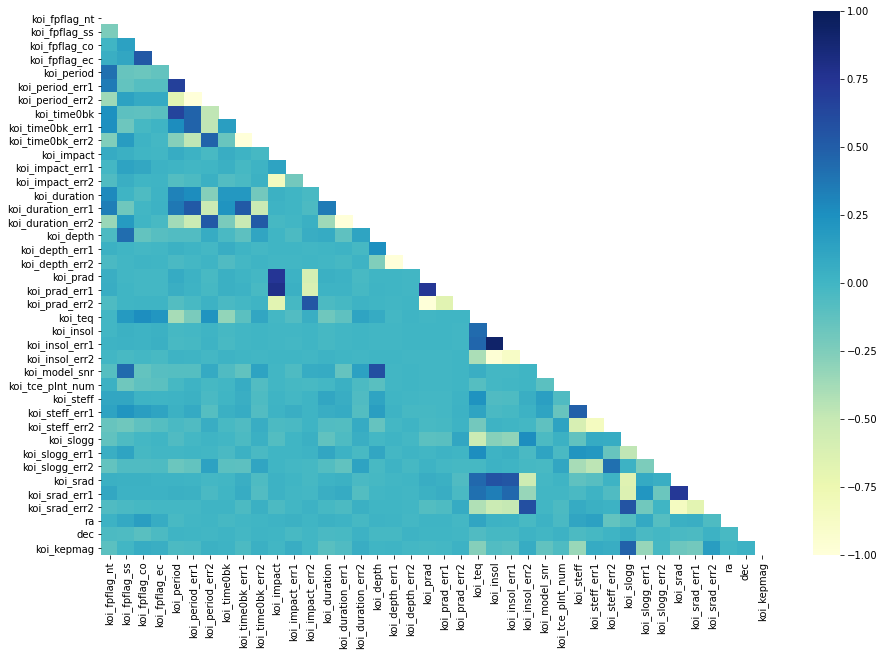

In [9]:
import seaborn as sns

#Correlation heatmap
#Correlation matrix = X.corr()

plt.figure(figsize=(15,10)) 
mask = np.triu(np.ones_like(X.corr(), dtype=np.bool))
heatmap = sns.heatmap(X.corr(), mask=mask, vmin=-1, vmax=1, cmap='YlGnBu')
plt.savefig("../Images/heatmap1.png")

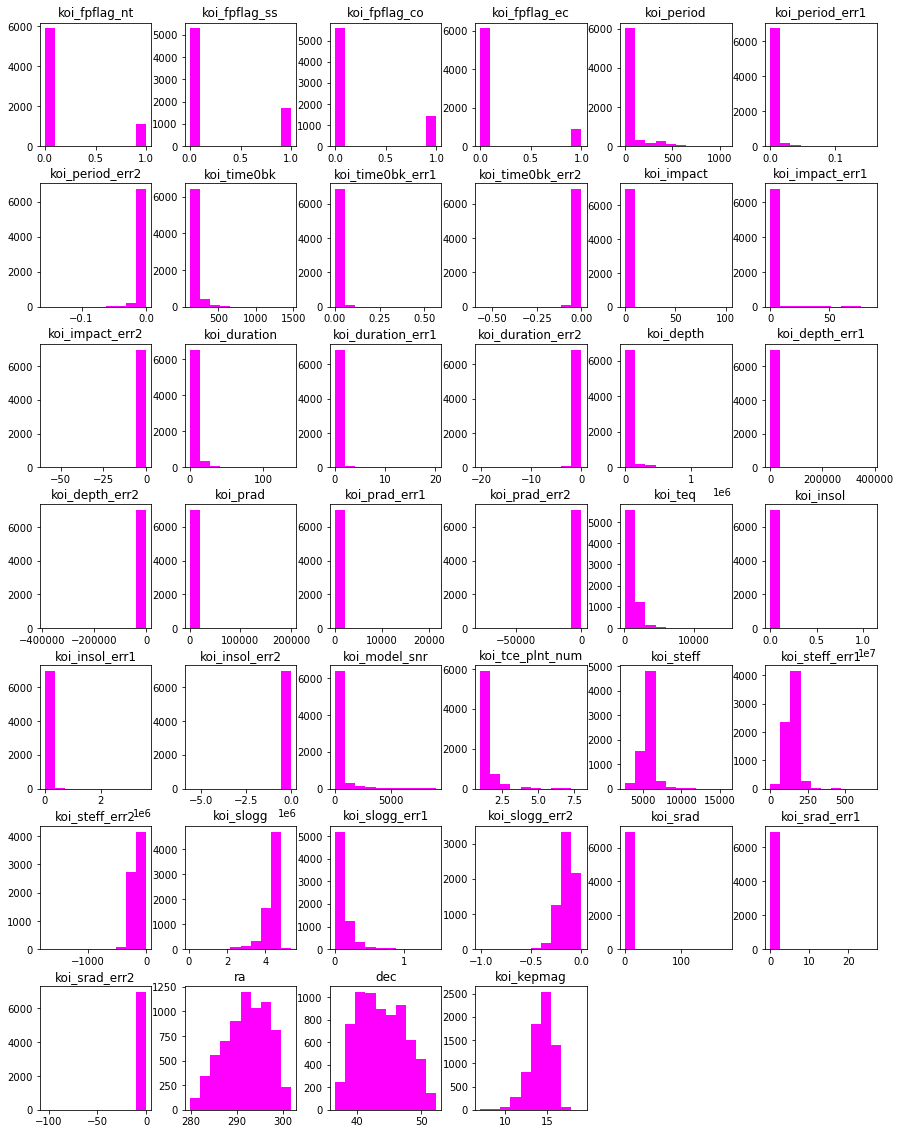

In [10]:
X.hist(figsize=(15,20), color="magenta", grid=False)
plt.savefig("../Images/Xhist.png")

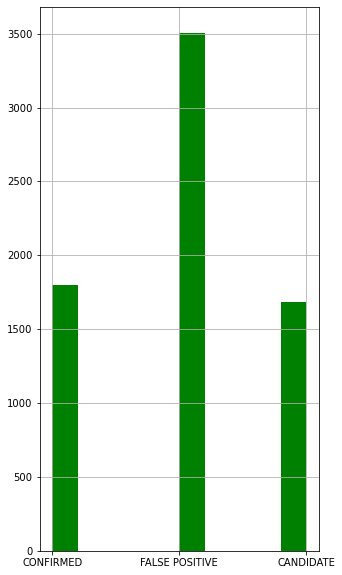

In [11]:
y.hist(figsize=(5,10), color="green")
plt.savefig("../Images/yhist.png")

In [12]:

model = RandomForestClassifier().fit(X,y)
important_df = pd.DataFrame({"feature": X.columns, \
                           "Importance": model.feature_importances_})
important_sort = important_df.sort_values("Importance", ascending=False)
important_sort

,feature,Importance
2,koi_fpflag_co,0.112968
0,koi_fpflag_nt,0.098540
1,koi_fpflag_ss,0.072320
26,koi_model_snr,0.055638
19,koi_prad,0.046287
20,koi_prad_err1,0.036003
14,koi_duration_err1,0.033081
15,koi_duration_err2,0.032963
3,koi_fpflag_ec,0.031941
29,koi_steff_err1,0.031104


In [13]:
import dataframe_image as dfi
dfi.export(important_sort, '../Images/important_sort.png')

In [14]:

col_one_list = important_df.sort_values("Importance", ascending=False)['feature'].tolist()
print(col_one_list)

['koi_fpflag_co', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_model_snr', 'koi_prad', 'koi_prad_err1', 'koi_duration_err1', 'koi_duration_err2', 'koi_fpflag_ec', 'koi_steff_err1', 'koi_prad_err2', 'koi_time0bk_err1', 'koi_duration', 'koi_time0bk_err2', 'koi_steff_err2', 'koi_depth', 'koi_period', 'koi_insol_err1', 'koi_period_err1', 'koi_period_err2', 'koi_impact', 'koi_teq', 'koi_insol', 'koi_time0bk', 'koi_depth_err1', 'koi_insol_err2', 'koi_srad_err1', 'koi_depth_err2', 'ra', 'koi_impact_err1', 'koi_kepmag', 'koi_slogg_err2', 'dec', 'koi_impact_err2', 'koi_srad', 'koi_steff', 'koi_slogg', 'koi_srad_err2', 'koi_slogg_err1', 'koi_tce_plnt_num']


# Select your features (columns)

In [15]:
# Set your y to be poi-disposition and your X to be all other columns
label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)
encoded_y

array([1, 2, 2, ..., 0, 2, 2])

In [16]:
# Drop *unimportant, irrelevant, or duplicate columns
#last min keep 'koi_fpflag_ec', 'koi_duration',  koi_depth', 

X = X.drop(columns=['koi_fpflag_ec','koi_period','koi_time0bk_err2',
                    'koi_time0bk_err1', 
                    'koi_steff_err2', 
                    'koi_insol_err1',
                    'koi_depth',
                    'koi_teq', 
                    'koi_impact', 
                    'koi_period_err1', 
                    'koi_period_err2', 
                    'koi_insol', 
                    'koi_time0bk', 
                    'koi_depth_err2', 
                    'ra', 
                    'koi_depth_err1', 
                    'koi_insol_err2', 
                    'dec', 
                    'koi_impact_err1', 
                    'koi_kepmag', 
                    'koi_impact_err2', 
                    'koi_slogg_err2', 
                    'koi_srad_err1', 
                    'koi_slogg', 
                    'koi_steff', 'koi_srad', 'koi_slogg_err1', 'koi_srad_err2', 'koi_tce_plnt_num', 
                    'koi_duration_err1', 'koi_duration_err2', 'koi_prad_err2', 'koi_steff_err1', 'koi_prad_err1'])

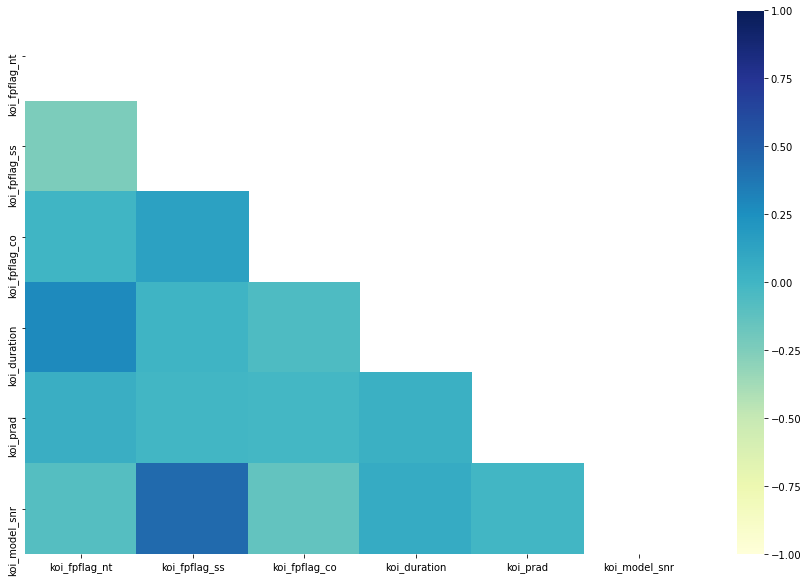

In [17]:
plt.figure(figsize=(15,10)) 
mask = np.triu(np.ones_like(X.corr(), dtype=np.bool))
heatmap = sns.heatmap(X.corr(), mask=mask, vmin=-1, vmax=1, cmap='YlGnBu')
plt.savefig("../Images/heatmap2.png")

In [18]:
#X= X.drop(columns= "koi_prad_err1")

# Create a Train Test Split


In [19]:

target = df["koi_disposition"]

X_train, X_test, y_train, y_test = train_test_split(X, target, random_state=42)

X_train

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_duration,koi_prad,koi_model_snr
6122,0,0,0,3.61600,1.24,10.8
6370,0,1,0,2.30900,0.86,13.8
2879,1,0,0,79.89690,3.21,254.3
107,0,0,0,2.63120,2.25,38.4
29,0,0,0,2.22739,12.21,696.5
...,...,...,...,...,...,...
3772,0,1,0,3.47103,50.31,1320.5
5191,0,0,0,5.19500,1.97,13.4
5226,0,1,0,1.68923,100.03,471.0
5390,1,0,0,27.29000,64.00,79.5


# Pre-processing

In [20]:
# Scale your data using appropriate scaler



from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)




# Train various  models



## Model 1

In [21]:
# Instantiate model 1 (e.g., logistic model)

model = SVC()
#model = SVC(kernel='linear')
#model.fit(X_test, y_test)


# Fit model using GridSearchCV if it makes sense
param_grid = {'C': [1, 5, 10],
              'kernel': ('linear', 'rbf')}
grid = GridSearchCV(model, param_grid, verbose=3)

In [22]:
# Look at model evalauation metrics - there are more options than just score
grid.fit(X_train_scaled, y_train)
#print('Test Acc: %.3f' % model.score(X_test, y_test))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.761, total=   0.1s
[CV] C=1, kernel=linear ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .................. C=1, kernel=linear, score=0.738, total=   0.1s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.775, total=   0.1s
[CV] C=1, kernel=linear ..............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] .................. C=1, kernel=linear, score=0.770, total=   0.1s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.782, total=   0.1s
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.774, total=   0.2s
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.780, total=   0.2s
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.779, total=   0.2s
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.782, total=   0.2s
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.773, total=   0.2s
[CV] C=5, kernel=linear ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    6.2s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 5, 10], 'kernel': ('linear', 'rbf')},
             verbose=3)

In [23]:
from sklearn.metrics import classification_report
predictions = grid.predict(X_test_scaled)
print(classification_report(y_test, predictions,))

                precision    recall  f1-score   support

     CANDIDATE       0.61      0.68      0.64       411
     CONFIRMED       0.70      0.64      0.67       484
FALSE POSITIVE       0.98      0.97      0.97       853

      accuracy                           0.81      1748
     macro avg       0.76      0.76      0.76      1748
  weighted avg       0.81      0.81      0.81      1748



## Model 2

In [24]:
# Instantiate model 2 (e.g., random forest model)

model = RandomForestClassifier(n_estimators=500).fit(X_train_scaled, y_train)





In [25]:
predictions = model.predict(X_test_scaled)
print(classification_report(y_test, predictions,))

                precision    recall  f1-score   support

     CANDIDATE       0.78      0.74      0.76       411
     CONFIRMED       0.79      0.84      0.82       484
FALSE POSITIVE       0.98      0.97      0.97       853

      accuracy                           0.88      1748
     macro avg       0.85      0.85      0.85      1748
  weighted avg       0.88      0.88      0.88      1748



In [26]:
#Model 3
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_scaled, y_train)


predictions = clf.predict(X_test_scaled)
print(classification_report(y_test, predictions,))

                precision    recall  f1-score   support

     CANDIDATE       0.68      0.68      0.68       411
     CONFIRMED       0.73      0.73      0.73       484
FALSE POSITIVE       0.96      0.96      0.96       853

      accuracy                           0.83      1748
     macro avg       0.79      0.79      0.79      1748
  weighted avg       0.83      0.83      0.83      1748



## Feel free to test more models

# Find best model and safe

In [27]:
# Compare metrics and determine best model


In [28]:
# Save best model - replace "your_model" with your model variable

import joblib
filename = 'exoplanet_model.sav'
joblib.dump(model, filename)

['exoplanet_model.sav']